<a href="https://colab.research.google.com/github/Rohit792A/Coefficient-Prediction-using-ML/blob/main/bank_customer_churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  Num Of Products  Has Credit Card  Is Active Member  \
0       0.00                1                1                 1   
1   83807.86                1                0                 1   
2  159660.80                3                1                 0   
3       0.00                2                0                 0   
4  125510.82                1                1                 1   

   Estimated Salary  Churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10      0

In [8]:
df.info() #looking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [9]:
df.duplicated('CustomerId').sum()

0

In [10]:
df=df.set_index('CustomerId')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [11]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df.replace({'Geography':{'France':2 ,'Germany':1,'Spain':0}},inplace=True)
df['Geography'].value_counts()

2    5014
1    2509
0    2477
Name: Geography, dtype: int64

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
df.replace({'Gender':{'Male':0 ,'Female':1}},inplace=True)
df['Gender'].value_counts()

0    5457
1    4543
Name: Gender, dtype: int64

In [16]:
df['Num Of Products'].value_counts( )

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [18]:
df.replace({'Num Of Products':{1:0 ,2:1,3:1,4:1}},inplace=True)
df['Has Credit Card'].value_counts( )

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [19]:
df['Is Active Member'].value_counts( )

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [20]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

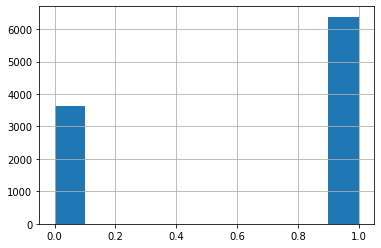

In [22]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)
df['Zero Balance'].hist()

In [23]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [24]:
df.columns


Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [25]:
X=df.drop(['Surname','Churn'], axis=1 )
y = df['Churn']
X.shape,y.shape


((10000, 11), (10000,))

In [26]:
df['Churn'].value_counts()


0    7963
1    2037
Name: Churn, dtype: int64

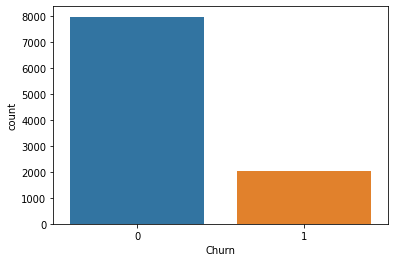

In [27]:
sns.countplot(x='Churn' , data=df);

In [28]:
X.shape , y.shape

((10000, 11), (10000,))

In [29]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=182529)
X_rus, y_rus = rus.fit_resample(X,y)
X_rus.shape, y_rus.shape, X.shape, y.shape


((4074, 11), (4074,), (10000, 11), (10000,))

In [30]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [31]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

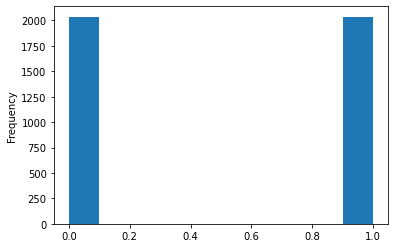

In [32]:
y_rus.plot(kind = 'hist')

In [33]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=182529)
X_ros, y_ros = ros.fit_resample(X,y)
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [34]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [35]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

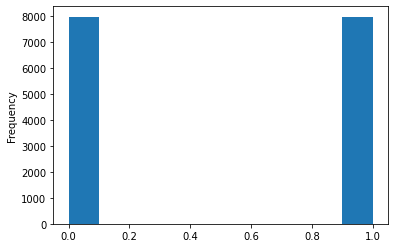

In [36]:
y_ros.plot(kind = 'hist')

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 182529)
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size = 0.3, random_state = 182529)
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros,y_ros,test_size = 0.3 , random_state = 182529)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


In [38]:
X_train[['CreditScore','Age', 'Tenure', 'Balance','Estimated Salary']] = ss.fit_transform(X_train[['CreditScore','Age', 'Tenure', 'Balance','Estimated Salary']])
X_test[['CreditScore','Age', 'Tenure', 'Balance','Estimated Salary']] = ss.fit_transform(X_test[['CreditScore','Age', 'Tenure', 'Balance','Estimated Salary']])

In [39]:
X_rus_train[['CreditScore','Age', 'Tenure', 'Balance','Estimated Salary']] = ss.fit_transform(X_rus_train[['CreditScore','Age', 'Tenure', 'Balance','Estimated Salary']])
X_rus_test[['CreditScore','Age', 'Tenure', 'Balance','Estimated Salary']] = ss.fit_transform(X_rus_test[['CreditScore','Age', 'Tenure', 'Balance','Estimated Salary']])

In [40]:
X_ros_train[['CreditScore','Age', 'Tenure', 'Balance','Estimated Salary']] = ss.fit_transform(X_ros_train[['CreditScore','Age', 'Tenure', 'Balance','Estimated Salary']])
X_ros_test[['CreditScore','Age', 'Tenure', 'Balance','Estimated Salary']] = ss.fit_transform(X_ros_test[['CreditScore','Age', 'Tenure', 'Balance','Estimated Salary']])

In [41]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [42]:
y_pred  = svc.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[2401,   40],
       [ 415,  144]])

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2441
           1       0.78      0.26      0.39       559

    accuracy                           0.85      3000
   macro avg       0.82      0.62      0.65      3000
weighted avg       0.84      0.85      0.82      3000



In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C' : [0.1,1,10],
    'gamma' : [1,0.1,0.01],
    'kernel' : ['rbf'],
    'class_weight' : ['balanced']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=2, cv=2 )
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [46]:
print(grid.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [47]:
grid_predictions = grid.predict(X_test)

In [48]:
confusion_matrix(y_test, grid_predictions)

array([[2058,  383],
       [ 266,  293]])

In [49]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2441
           1       0.43      0.52      0.47       559

    accuracy                           0.78      3000
   macro avg       0.66      0.68      0.67      3000
weighted avg       0.80      0.78      0.79      3000



In [50]:
svc_rus = SVC()
svc_rus.fit(X_rus_train, y_rus_train)

SVC()

In [51]:
y_rus_pred  = svc_rus.predict(X_rus_test)

In [52]:
confusion_matrix(y_rus_test, y_rus_pred)


array([[471, 153],
       [169, 430]])

In [53]:
print(classification_report(y_rus_test, y_rus_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       624
           1       0.74      0.72      0.73       599

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [54]:
param_grid = {
    'C' : [0.1,1,10],
    'gamma' : [1,0.1,0.01],
    'kernel' : ['rbf'],
    'class_weight' : ['balanced']}
grid_rus = GridSearchCV(SVC(), param_grid, refit = True, verbose=2, cv=2 )
grid_rus.fit(X_rus_train,y_rus_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [55]:
print(grid_rus.best_estimator_)print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [56]:
grid_rus_predictions = grid_rus.predict(X_rus_test)
confusion_matrix(y_rus_test, grid_rus_predictions)

array([[474, 150],
       [176, 423]])

In [57]:
print(classification_report(y_rus_test, grid_rus_predictions))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       624
           1       0.74      0.71      0.72       599

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [58]:
svc_ros = SVC()
svc_ros.fit(X_ros_train, y_ros_train)

SVC()

In [59]:
y_ros_pred  = svc_ros.predict(X_ros_test)

In [60]:
confusion_matrix(y_ros_test, y_ros_pred)

array([[1828,  553],
       [ 688, 1709]])

In [61]:
print(classification_report(y_ros_test, y_ros_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      2381
           1       0.76      0.71      0.73      2397

    accuracy                           0.74      4778
   macro avg       0.74      0.74      0.74      4778
weighted avg       0.74      0.74      0.74      4778



In [62]:
param_grid = {
    'C' : [0.1,1,10],
    'gamma' : [1,0.1,0.01],
    'kernel' : ['rbf'],
    'class_weight' : ['balanced']}
grid_ros = GridSearchCV(SVC(), param_grid, refit = True, verbose=2, cv=2 )
grid_ros.fit(X_ros_train,y_ros_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [63]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [64]:
grid_ros_predictions = grid_ros.predict(X_ros_test)
confusion_matrix(y_ros_test, grid_ros_predictions)

array([[1965,  416],
       [  80, 2317]])

In [65]:
print(classification_report(y_ros_test, grid_ros_predictions))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2381
           1       0.85      0.97      0.90      2397

    accuracy                           0.90      4778
   macro avg       0.90      0.90      0.90      4778
weighted avg       0.90      0.90      0.90      4778

